<a href="https://colab.research.google.com/github/MichalBKM/Mavnat_Proj1/blob/main/Intro_to_Machine_Learning_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)
data = mnist["data"]
labels = mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import numpy.random
import numpy as np
idx = numpy.random.RandomState(0).choice(70000, 11000)
train = data[idx[:10000], :].astype(int)
train_labels = labels[idx[:10000]]
test = data[idx[10000:], :].astype(int)
test_labels = labels[idx[10000:]]

In [ ]:
def kNN(train, train_labels, query, k):
  dist = np.sqrt(np.sum(np.power(train-query, 2),axis=1)) #Euclidean metric
  knn = np.argsort(dist)[:k]
  cnt = np.bincount(train_labels[knn].astype(float).astype(int))
  return(str(np.argmax(cnt))) #one of the most common labels among query's kNN

In [ ]:
def kNN_accuracy(n,k):
  knn = lambda index: kNN(train[:n], train_labels[:n], test[index],k)
  vector = np.vectorize(knn)
  label_pred = vector(np.arange(1000))
  return np.mean(np.where(test_labels==label_pred,1,0))
print(kNN_accuracy(1000,10))

0.846


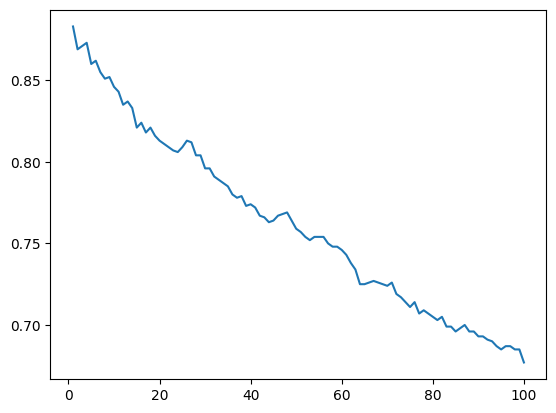

In [ ]:
import matplotlib.pyplot as plt

k = np.arange(100)+1
accuracy = lambda k: kNN_accuracy(1000,k)
vector = np.vectorize(accuracy)
accuracy_vector = vector(k)
plt.plot(k, accuracy_vector)
plt.show()

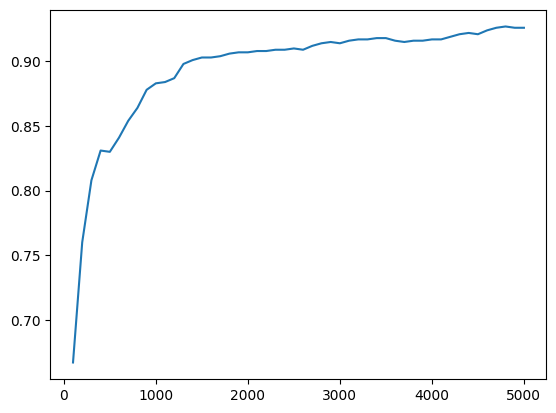

In [ ]:
import matplotlib.pyplot as plt

n = np.linspace(100,5000,num=50).astype(int)
accuracy = lambda n: kNN_accuracy(n,1)
vector = np.vectorize(accuracy)
accuracy_vector = vector(n)
plt.plot(n, accuracy_vector)
plt.show()